# Chem 30324, Spring 2018, Homework 9
Due April 11, 2018

## Molecular Orbitals.
### The orbitals in molecules can be constructed from linear combinations of atomic orbitals on the constituent atoms (in this context, the atomic orbitals are called “basis functions”). One of the factors that determines whether two atomic orbitals can form a molecular orbital is there ability to overlap. Consider two atoms, A and B, aligned on the z axis and separated by a distance $R$.

### 1. The overlap between two 1s orbitals on A and B can be shown to be: $$S = \left \{1+\frac{R}{a_0}+\frac{1}{3}\left (\frac{R}{a_0}\right )^2\right \}e^{-R/a_0}$$ Plot out the overlap as a function of the internuclear distance $R$. Qualitatively explain why it has the shape it has.

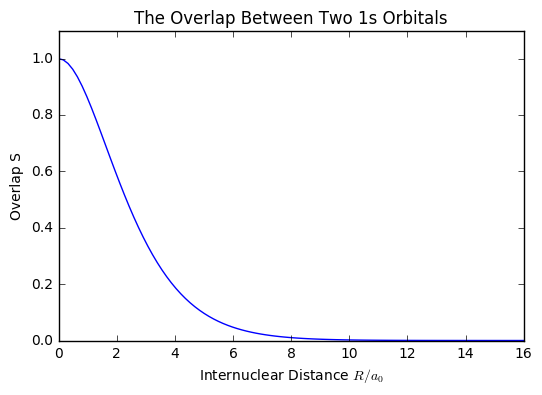

In [17]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0,16,100) # r = R/a_0
P = (1+r+1/3*r**2)*np.exp(-r)
plt.plot(r,P)

plt.xlim(0,16)
plt.ylim(0,1.1)
plt.xlabel('Internuclear Distance $R/a_0$')
plt.ylabel('Overlap S')
plt.title('The Overlap Between Two 1s Orbitals')
plt.show()

At R = 0, the two orbitals overlap completely, thus overlap integral S = 1. As R increases, the orbital overlap decreases, then it approaches a point where there is no orbital overlap (S = 0).

### 2. The overlap functions for other pairs of orbitals are more complicated, but the general features are easily inferred. Neatly sketch the orbital overlap between a 1s orbital on A and 2p$_z$ orbital on B as a function $R$. Carefully indicate the limiting values as $R \rightarrow 0$ and $R \rightarrow \infty$.

![](imgs/HW9-1.jpg)

### 3. Ditto for 1s orbital on A and 2p$_x$ orbital on B.

### 4. Ditto for 2p$_z$ orbital on A and 2p$_z$ orbital on B.

### 5. Ditto for 2p$_z$ orbital on A and 3d$_z^2$ orbital on B.

### 6. What property besides overlap determines whether two atomic orbitals will form a molecular orbital?

The energies of the two atomic orbitals should match.

## The Hückel model and π orbitals

### One of the first successes of molecular orbital theory was application to the π systems of conjugated hydrocarbons. (See [Roberts, Notes on Molecular Orbital Theory](http://resolver.caltech.edu/CaltechBOOK:1961.001).) In the Hückel model, one constructs a π-only secular matrix and uses simple rules for the matrix elements. $S_{ii} = 1$ for a basis function with itself and $S_{ij} = 0$ otherwise. $F_{ii} = \alpha$ for a basis function with itself, $F_{ij}=\beta$ between adjacent atoms, and $F_{ij}=0$ otherwise. 

### 7. Construct and solve the secular matrix for cyclopentane, C$_5$H$_5$.  Make an energy level diagram for the π system.

In [19]:
from sympy import *
alpha,beta = symbols('alpha beta')
M=Matrix([[alpha, beta, 0 , 0, beta],[beta, alpha, beta, 0, 0],[0, beta, alpha, beta, 0],[0, 0, beta, alpha, beta],[beta, 0, 0, beta, alpha]])

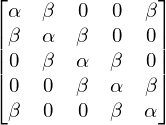

In [20]:
M

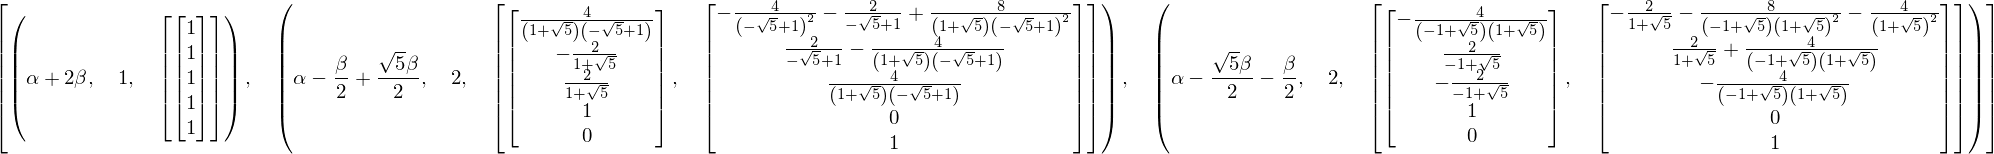

In [21]:
M.eigenvects()

$E_1 = \alpha + 2\beta$, $E_2 = \alpha -\frac{\beta}{2}+ \frac{\sqrt{5}\beta}{2} \approx \alpha + 0.618\beta$, $E_3 = \alpha -\frac{\beta}{2}- \frac{\sqrt{5}\beta}{2} \approx \alpha - 1.618\beta$

![](imgs/HW9-2.jpg)

### 8. Use back-substitution to determine the coefficients for each molecular orbital.

The 5 eigenvectors are the 5 sets of coefficients. Use python to normalize the coefficients to make $c_1^2 + c_2^2 + c_3^2 + c_4^2 + c_5^2 = 1$.

In [22]:
import numpy as np
"eigenvectors" # the munbers in eigenvectors are already simplified using "simplify" in sympy
c1 = [1,1,1,1,1] 
c2 = [-1,-np.sqrt(5)/2 + 1/2,-1/2 + np.sqrt(5)/2,1,0] 
c3 = [-1/2 + np.sqrt(5)/2,-np.sqrt(5)/2 + 1/2,-1,0,1] 
c4 = [-1,1/2 + np.sqrt(5)/2,-np.sqrt(5)/2 - 1/2,1,0] 
c5 = [-np.sqrt(5)/2 - 1/2,1/2 + np.sqrt(5)/2,-1,0,1]
"normalize the coefficients"
s1 = s2 = s4 = 0 # s3 = s2, s5 = s4
n1,n2,n3,n4,n5 = [],[],[],[],[] # normalized eigenvectors
for i in c1:
    s1 = s1 + i**2
for i in c2:
    s2 = s2 + i**2
for i in c4:
    s4 = s4 + i**2
for i in c1:
    n1.append(i/np.sqrt(s1))
for i in c2:
    n2.append(i/np.sqrt(s2))
for i in c3:
    n3.append(i/np.sqrt(s2)) #  s3 = s2
for i in c4:
    n4.append(i/np.sqrt(s4))
for i in c5:
    n5.append(i/np.sqrt(s4)) # s5 = s4
print(n1,n2,n3,n4,n5)

[0.44721359549995793, 0.44721359549995793, 0.44721359549995793, 0.44721359549995793, 0.44721359549995793] [-0.60150095500754575, -0.37174803446018456, 0.37174803446018456, 0.60150095500754575, 0.0] [0.37174803446018456, -0.37174803446018456, -0.60150095500754575, 0.0, 0.60150095500754575] [-0.37174803446018445, 0.60150095500754563, -0.60150095500754563, 0.37174803446018445, 0.0] [-0.60150095500754563, 0.60150095500754563, -0.37174803446018445, 0.0, 0.37174803446018445]


$\psi_1 = 0.4472\phi_1 + 0.4472\phi_2 + 0.4472\phi_3 + 0.4472\phi_4 +0.4472\phi_5$

$\psi_2 = -0.6015\phi_1 -0.3717\phi_2 + 0.3717\phi_3 + 0.6015\phi_4$

$\psi_3 = 0.3717\phi_1 -0.3717\phi_2 -0.6015\phi_3 + 0.6015\phi_5$

$\psi_4 = -0.3717\phi_1 + 0.6015\phi_2 -0.6015\phi_3 + 0.3717\phi_4$

$\psi_5 = -0.6015\phi_1 + 0.6015\phi_2 -0.3717\phi_3 + 0.3717\phi_5$

### 9. Predict the spin-multiplicities of C$_5$H$_5^+$, C$_5$H$_5$, and C$_5$H$_5^-$.  In which one do you expect all the C-C distances to be the same?

According to the energy level diagram for the π system, C$_5$H$_5^+$ has 4 $\pi$ electrons, 2 unpaired electrons, the spin-multiplicity is 3; C$_5$H$_5$ has 5 $\pi$ electrons, 1 unpaired electrons, the spin-multiplicity is 2; C$_5$H$_5^-$ has 6 $\pi$ electrons, 0 unpaired electrons, the spin-multiplicity is 1. C$_5$H$_5^-$ follows the Hückel's rule (has 4n + 2 $\pi$ electrons), so it has aromatic properties and all the C-C distances will be the same.

## Computational chemistry. 
### Today properties of a molecule are more often than not calculated rather than inferred. Quantitative molecular quantum mechanical calculations require highly specialized numerical solvers like Gaussian (<https://www.gaussian.com>). Following are instructions for using Gaussian with the Webmo graphical interface (<https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi>).

### Now, let’s set up your calculation (you may do this with a partner if you choose):
1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to sketch a molecule.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Select the “B3LYP” functional and the appropriate basis set.
6. Select the right arrow to run the calculation.
7. From the job manager window choose the completed calculation to view the results.

The molecule you are to study depends on your last name. Choose according to the list:
+ A-G: **CO**
+ H-R: **BN**
+ S-Z: **BeO**

For your convenience, here are the total energies (in Hartree, 27.212 eV/Hartree) of the constituent atoms, calculated using the B3LYP DFT treatment of $v_{ee}$ and the “Routine” basis set:

|Atom|Energy|Atom|Energy|
|-|-|-|-|
|B|–24.65435|N|–54.559498|
|Be|–14.65446|O|–75.031179|
|C|–37.68086|F|–99.681600|

### 10. Construct a potential energy surface for your molecule. Using covalent radii, guess an approximate equilbrium bond length, and use the Webmo editor to draw the molecule with that length. Specify the “Molecular Energy” option to Gaussian and the “Routine” basis set for better accuracy. Calculate and plot out total molecular energy vs. bond distance in increments of 0.05 Å about your guessed minimum, including enough points to encompass the actual minimum. (You will find it convenient to subtract off the individual atom energies from the molecular total energy and to convert to more convenient units, like eV or kJ/mol.) By fitting the few points nearest the minimum, determine the equilibrium bond length. How does your result compare to literature?

Literature Bond length CO 1.128 Å, BN 1.325 Å, BeO 1.331 Å.

### CO molecule

In [1]:
"CO molecule"
import numpy as np
import matplotlib.pyplot as plt

"quadratic fit"
E_C = -37.68086 # Ha
E_O = -75.031179 # Ha
R_CO = [1.00, 1.05, 1.10, 1.15, 1.2, 1.25] # distance, angstrom
E_total_CO = [-113.249199,-113.287858,-113.305895,-113.309135,-113.301902,-113.287408] # Ha, total energy of the molecule
E_CO = [] # eV, subtract off the individual atom energies from the molecular total energy and convert to eV
for i in E_total_CO:
    E_CO.append((i-E_C-E_O)*27.212)
fit = np.polyfit(R_CO, E_CO, 2) # quadratic fit
print(fit)

[  71.30418671 -164.11063691   78.12636826]


The energy minimum is -16.30090 eV.


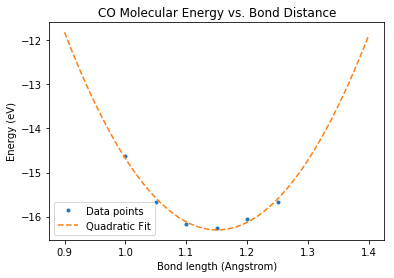

The equilibrium bond length is 1.1508 angstroms.


In [2]:
"plot energy vs. bond length"
x = np.linspace(0.9, 1.4, 100)
z = 71.30418671*x**2 - 164.1106369*x + 78.12636826 # quadratic fit
E_min_CO = min(z) # minimum energy
print('The energy minimum is {:.5f} eV.'.format(E_min_CO)) 
plt.plot(R_CO, E_CO, '.', label='Data points')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('CO Molecular Energy vs. Bond Distance')
plt.legend()
plt.show()

"find equilbrium bond length"
import sympy as sp
x = sp.symbols('x')
z = 71.30418671*x**2 - 164.1106369*x + 78.12636826 # quadratic fit
l = sp.solve(sp.diff(z,x),x)
print('The equilibrium bond length is {:.4f} angstroms.'.format(l[0])) # equilibrium bond length

### BN molecule

In [3]:
"BN molecule"
import numpy as np
import matplotlib.pyplot as plt

"quadratic fit"
E_B = -24.65435 # Ha
E_N = -54.559498 # Ha
R_BN = [1.15, 1.2, 1.25, 1.3, 1.35, 1.4] # distance, angstrom
E_total_BN = [-79.359357,-79.376368,-79.383355,-79.382896,-79.377003,-79.367236] # Ha, total energy of the molecule
E_BN = [] # eV, subtract off the individual atom energies from the molecular total energy and convert to eV
for i in E_total_BN:
    E_BN.append((i-E_B-E_N)*27.212)
fit = np.polyfit(R_BN, E_BN, 2) # quadratic fit
print(fit)

[ 36.03840657 -92.53300264  54.76376165]


The energy minimum is -4.63365 eV.


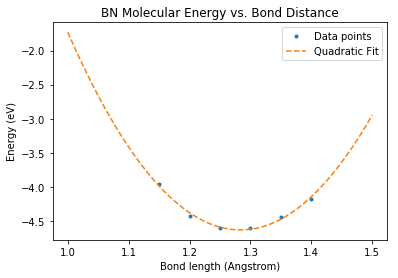

The equilibrium bond length is 1.2838 angstroms.


In [4]:
"plot energy vs. bond length"
x = np.linspace(1.0, 1.5, 100)
z = 36.03840657*x**2 - 92.53300264*x + 54.76376165 # quadratic fit
E_min_BN = min(z) # minimum energy
print('The energy minimum is {:.5f} eV.'.format(E_min_BN)) 
plt.plot(R_BN, E_BN, '.', label='Data points')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('BN Molecular Energy vs. Bond Distance')
plt.legend()
plt.show()

"find equilbrium bond length"
import sympy as sp
x = sp.symbols('x')
z = 36.03840657*x**2 - 92.53300264*x + 54.76376165 # quadratic fit
l = sp.solve(sp.diff(z,x),x)
print('The equilibrium bond length is {:.4f} angstroms.'.format(l[0])) # equilibrium bond length

### BeO molecule

In [5]:
"BeO molecule"
import numpy as np
import matplotlib.pyplot as plt

"quadratic fit"
E_Be = -14.65446 # Ha
E_O = -75.031179 # Ha
R_BeO = [1.2, 1.25, 1.3, 1.35, 1.4, 1.45] # distance, angstrom
E_total_BeO = [-89.880569,-89.893740,-89.899599,-89.899934,-89.896149,-89.889335] # Ha, total energy of the molecule
E_BeO = [] # eV, subtract off the individual atom energies from the molecular total energy and convert to eV
for i in E_total_BeO:
    E_BeO.append((i-E_Be-E_O)*27.212)
fit = np.polyfit(R_BeO, E_BeO, 2) # quadratic fit
print(fit)

[ 26.92063723 -72.13881957  42.4763745 ]


The energy minimum is -5.85078 eV.


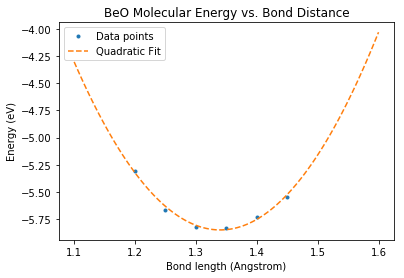

The equilibrium bond length is 1.3398 angstroms.


In [6]:
"plot energy vs. bond length"
x = np.linspace(1.1, 1.6, 100)
z = 26.92063723*x**2 - 72.13881957*x + 42.4763745 # quadratic fit
E_min_BeO = min(z) # minimum energy
print('The energy minimum is {:.5f} eV.'.format(E_min_BeO)) 
plt.plot(R_BeO, E_BeO, '.', label='Data points')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('BeO Molecular Energy vs. Bond Distance')
plt.legend()
plt.show()

"find equilbrium bond length"
import sympy as sp
x = sp.symbols('x')
z = 26.92063723*x**2 - 72.13881957*x + 42.4763745 # quadratic fit
l = sp.solve(sp.diff(z,x),x)
print('The equilibrium bond length is {:.4f} angstroms.'.format(l[0])) # equilibrium bond length

### 11. Use the quadratic fit from Question 10 to determine the harmonic vibrational frequency of your molecule, in cm$^{-1}$. Recall that the force constant is the second derivative of the energy at the minimum, and that the frequency (in wavenumbers) is related to the force constant according to $$\tilde{\nu} = \frac{1}{2\pi c}\sqrt{\frac{k}{\mu}}$$

### CO molecule

In [7]:
"calculate harmonic vibrational frequency"
J = 1.6022e-19 # 1 eV = 1.6022e-19 J
A = 1e-10 # 1 angstrom = 1e-10 m
c = 2.99792e8 # m/s
m_C = 12.0107
m_O = 15.9994
mu_CO = m_C*m_O/(m_C+m_O)*1.6605e-27 # kg, reduced mass
k_CO = 2*71.30418671*J/A**2 # J/m**2
nu_CO = 1/(2*np.pi*c)*np.sqrt(k_CO/mu_CO)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is {:.2f} cm^-1.'.format(nu_CO))

The harmonic vibrational frequency is 2377.57 cm^-1.


### BN molecule

In [8]:
"calculate harmonic vibrational frequency"
J = 1.6022e-19 # 1 eV = 1.6022e-19 J
A = 1e-10 # 1 angstrom = 1e-10 m
c = 2.99792e8 # m/s
m_B = 10.811
m_N = 14.0067
mu_BN = m_B*m_N/(m_B+m_N)*1.6605e-27 # kg, reduced mass
k_BN = 2*36.0384*J/A**2 # J/m**2
nu_BN = 1/(2*np.pi*c)*np.sqrt(k_BN/mu_BN)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is {:.2f} cm^-1.'.format(nu_BN))

The harmonic vibrational frequency is 1792.32 cm^-1.


### BeO molecule

In [9]:
"calculate harmonic vibrational frequency"
J = 1.6022e-19 # 1 eV = 1.6022e-19 J
A = 1e-10 # 1 angstrom = 1e-10 m
c = 2.99792e8 # m/s
m_Be = 9.01218
m_O = 15.9994
mu_BeO = m_Be*m_O/(m_Be+m_O)*1.6605e-27 # kg, reduced mass
k_BeO = 2*26.92063723*J/A**2 # J/m**2
nu_BeO = 1/(2*np.pi*c)*np.sqrt(k_BeO/mu_BeO)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is {:.2f} cm^-1.'.format(nu_BeO))

The harmonic vibrational frequency is 1593.68 cm^-1.


### 12. Use your results to determine the zero-point-corrected bond energy of your molecule. How does this model compare with the experimental value?

Experimental value: CO 1072 kJ/mol, BN 385 kJ/mol, BeO 445 kJ/mol.

### CO molecule

In [10]:
"determine the zero-point-corrected bond energy"
h = 6.62607e-34 # J*s
NA = 6.02214e23
E0_CO = 0.5*h*nu_CO*100*c # J, zero point energy for harmonic oscillator
E_Bond_CO = (E_min_CO*J + E0_CO)*NA/1000 # kJ/mol, zero-point-corrected bond energy
print('The zero-point-corrected bond energy is {:.4f} kJ/mol.'.format(-E_Bond_CO))

The zero-point-corrected bond energy is 1558.5998 kJ/mol.


### BN molecule

In [11]:
"determine the zero-point-corrected bond energy"
h = 6.62607e-34 # J*s
NA = 6.02214e23
E0_BN = 0.5*h*nu_BN*100*c # J, zero point energy for harmonic oscillator
E_Bond_BN = (E_min_BN*J + E0_BN)*NA/1000 # kJ/mol, zero-point-corrected bond energy
print('The zero-point-corrected bond energy is {:.4f} kJ/mol.'.format(-E_Bond_BN))

The zero-point-corrected bond energy is 436.3648 kJ/mol.


### BeO molecule

In [12]:
"determine the zero-point-corrected bond energy"
h = 6.62607e-34 # J*s
NA = 6.02214e23
E0_BeO = 0.5*h*nu_BeO*100*c # J, zero point energy for harmonic oscillator
E_Bond_BeO = (E_min_BeO*J + E0_BeO)*NA/1000 # kJ/mol, zero-point-corrected bond energy
print('The zero-point-corrected bond energy is {:.4f} kJ/mol.'.format(-E_Bond_BeO))

The zero-point-corrected bond energy is 554.9907 kJ/mol.
